In [471]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

# Weather Data

### Read Data from CSV

In [2]:
raw = pd.read_csv('wxkslc.csv', low_memory=False)
raw.head()

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,sea_level_pressure_set_1,weather_cond_code_set_1,cloud_layer_3_code_set_1,pressure_tendency_set_1,qc_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,metar_origin_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,visibility_set_1,metar_remark_set_1,metar_set_1,air_temp_high_6_hour_set_1,air_temp_low_6_hour_set_1,peak_wind_speed_set_1,ceiling_set_1,pressure_change_code_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
0,NaN,NaN,INHG,Fahrenheit,Fahrenheit,%,knots,Degrees,knots,Inches,Millibars,code,code,code,code,Inches,Inches,code,code,code,Inches,Inches,Statute miles,text,text,Fahrenheit,Fahrenheit,knots,Feet,code,Fahrenheit,Fahrenheit,Degrees,Fahrenheit,Fahrenheit,Code,Millibars,Millibars,Fahrenheit,Code,NaN,NaN
1,KSLC,2016-01-01T00:00:00Z,30.45,12.02,6.08,76.51,9.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,2.9,N,883.05,1027.38,NaN,Clear,NaN,NaN
2,KSLC,2016-01-01T00:05:00Z,30.45,12.02,6.08,76.51,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,N,883.05,1027.38,NaN,Clear,NaN,NaN
3,KSLC,2016-01-01T00:10:00Z,30.45,12.02,6.08,76.51,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,N,883.05,1027.38,NaN,Clear,NaN,NaN
4,KSLC,2016-01-01T00:15:00Z,30.45,12.02,5.0,72.82,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.88,NaN,N,883.05,1027.41,NaN,Clear,NaN,NaN


### Select Relevant Features

In [3]:
selectCol = raw[['Date_Time','air_temp_set_1','dew_point_temperature_set_1d',
                 'wind_speed_set_1','wind_direction_set_1','wind_gust_set_1',
                 'snow_depth_set_1','cloud_layer_1_code_set_1',
                 'cloud_layer_2_code_set_1','cloud_layer_3_code_set_1',
                 'visibility_set_1','ceiling_set_1','weather_condition_set_1d',
                 'weather_condition_set_2d','weather_condition_set_3d']]

In [4]:
selectRow = selectCol.iloc[1:]
selectRow.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,visibility_set_1,ceiling_set_1,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
1,2016-01-01T00:00:00Z,12.02,5.98,9.0,360.0,NaN,NaN,1.0,NaN,NaN,9.0,NaN,Clear,NaN,NaN
2,2016-01-01T00:05:00Z,12.02,5.98,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
3,2016-01-01T00:10:00Z,12.02,5.98,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
4,2016-01-01T00:15:00Z,12.02,4.88,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
5,2016-01-01T00:20:00Z,10.94,4.9,7.0,350.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN


### Dealing with Missing Values

First take a look at the rows with most values missing and the missing value rate for each feature.

In [5]:
#rows with most features missing
mostNaN = selectRow.loc[selectRow.apply(lambda x:x.isnull().sum()>=14, axis=1)]
mostNaN.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,visibility_set_1,ceiling_set_1,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
19864,2016-03-09T16:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51919,2016-07-29T14:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52021,2016-07-29T22:20:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52031,2016-07-29T23:05:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52090,2016-07-30T03:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#missing value rate
missingRateBefore = selectRow.apply(lambda x: x.isnull().sum()/x.size, axis=0)
missingRateBefore

Date_Time                       0.000000
air_temp_set_1                  0.000805
dew_point_temperature_set_1d    0.000805
wind_speed_set_1                0.005159
wind_direction_set_1            0.017921
wind_gust_set_1                 0.924559
snow_depth_set_1                0.996531
cloud_layer_1_code_set_1        0.007405
cloud_layer_2_code_set_1        0.781717
cloud_layer_3_code_set_1        0.905902
visibility_set_1                0.001004
ceiling_set_1                   0.691088
weather_condition_set_1d        0.007415
weather_condition_set_2d        0.973809
weather_condition_set_3d        0.998549
dtype: float64

For **Date_Time**, there are no missing values.

In [7]:
perfect = selectRow['Date_Time']
perfect.head()

1    2016-01-01T00:00:00Z
2    2016-01-01T00:05:00Z
3    2016-01-01T00:10:00Z
4    2016-01-01T00:15:00Z
5    2016-01-01T00:20:00Z
Name: Date_Time, dtype: object

For features that **have value in most of the rows**, use the strategy that replacing the missing value with the last valid observation in the time series.

In [8]:
common_raw = selectRow[['air_temp_set_1','dew_point_temperature_set_1d','wind_speed_set_1',
                        'wind_direction_set_1','cloud_layer_1_code_set_1','visibility_set_1',
                        'weather_condition_set_1d']]
common = common_raw.fillna(method='ffill')
common.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,weather_condition_set_1d
1,12.02,5.98,9.0,360.0,1.0,9.0,Clear
2,12.02,5.98,7.0,360.0,1.0,10.0,Clear
3,12.02,5.98,7.0,360.0,1.0,10.0,Clear
4,12.02,4.88,7.0,360.0,1.0,10.0,Clear
5,10.94,4.9,7.0,350.0,1.0,10.0,Clear


In [9]:
common1 = common.iloc[:,0:-1]
common1.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1
1,12.02,5.98,9.0,360.0,1.0,9.0
2,12.02,5.98,7.0,360.0,1.0,10.0
3,12.02,5.98,7.0,360.0,1.0,10.0
4,12.02,4.88,7.0,360.0,1.0,10.0
5,10.94,4.9,7.0,350.0,1.0,10.0


In [10]:
common2 = common.iloc[:,-1]
common2.head()

1    Clear
2    Clear
3    Clear
4    Clear
5    Clear
Name: weather_condition_set_1d, dtype: object

For features that **have value missing in most of the rows**, use different strategy respectively.

In [11]:
rare = selectRow[['wind_gust_set_1','snow_depth_set_1','cloud_layer_2_code_set_1',
                  'cloud_layer_3_code_set_1','ceiling_set_1','weather_condition_set_2d',
                  'weather_condition_set_3d']]
rare.head()

,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,weather_condition_set_2d,weather_condition_set_3d
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For **Wind Gust** and **Snow Depth**, replace with 0. 

In [12]:
rare1 = rare[['wind_gust_set_1','snow_depth_set_1']].fillna(0)
rare1.head()

,wind_gust_set_1,snow_depth_set_1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


For **Cloud**, replace with mode 1.0 (which means clear sky).

In [13]:
pd.to_numeric(common['cloud_layer_1_code_set_1']).describe()

count    100608.000000
mean        320.051258
std         477.498206
min           1.000000
25%           1.000000
50%           1.000000
75%         604.000000
max        2506.000000
Name: cloud_layer_1_code_set_1, dtype: float64

In [14]:
pd.to_numeric(rare['cloud_layer_2_code_set_1']).describe()

count    21961.000000
mean       962.164564
std        574.447035
min         62.000000
25%        552.000000
50%        854.000000
75%       1204.000000
max       2806.000000
Name: cloud_layer_2_code_set_1, dtype: float64

In [15]:
pd.to_numeric(rare['cloud_layer_3_code_set_1']).describe()

count    9467.000000
mean     1271.244217
std       684.126026
min       114.000000
25%       704.000000
50%      1103.000000
75%      2003.000000
max      2803.000000
Name: cloud_layer_3_code_set_1, dtype: float64

In [16]:
rare2 = rare[['cloud_layer_2_code_set_1','cloud_layer_3_code_set_1']].fillna(5000)
rare2.head()

,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1
1,5000,5000
2,5000,5000
3,5000,5000
4,5000,5000
5,5000,5000


For **Ceiling**, replace with maximum.

In [17]:
pd.to_numeric(rare['ceiling_set_1']).max()

28000.0

In [18]:
rare3 = rare[['ceiling_set_1']].fillna(28000)
rare3.head()

,ceiling_set_1
1,28000
2,28000
3,28000
4,28000
5,28000


For Weather Condition, do nothing.

In [19]:
rare4 = rare[['weather_condition_set_2d','weather_condition_set_3d']]
rare4.head()

,weather_condition_set_2d,weather_condition_set_3d
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


### Feature Encoding 

Change date and time features to **DateTime** format.

In [20]:
perfect_dt = perfect.apply(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))
perfect_dt.head()

1   2016-01-01 00:00:00
2   2016-01-01 00:05:00
3   2016-01-01 00:10:00
4   2016-01-01 00:15:00
5   2016-01-01 00:20:00
Name: Date_Time, dtype: datetime64[ns]

Change numeric features to **float** format.

In [21]:
common1_num = common1.apply(pd.to_numeric, errors='raise')
common1_num.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1
1,12.02,5.98,9.0,360.0,1.0,9.0
2,12.02,5.98,7.0,360.0,1.0,10.0
3,12.02,5.98,7.0,360.0,1.0,10.0
4,12.02,4.88,7.0,360.0,1.0,10.0
5,10.94,4.90,7.0,350.0,1.0,10.0


In [22]:
rare1_num = rare1.apply(pd.to_numeric, errors='raise')
rare1_num.head()

,wind_gust_set_1,snow_depth_set_1
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [23]:
rare2_num = rare2.apply(pd.to_numeric, errors='raise')
rare2_num.head()

,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1
1,5000.0,5000.0
2,5000.0,5000.0
3,5000.0,5000.0
4,5000.0,5000.0
5,5000.0,5000.0


In [24]:
rare3_num = rare3.apply(pd.to_numeric, errors='raise')
rare3_num.head()

,ceiling_set_1
1,28000.0
2,28000.0
3,28000.0
4,28000.0
5,28000.0


For categorical feature 'Weather Condition', binarize with **dummy/indicator** variables.

In [25]:
wx_cond_set1 = set(common2.unique())

In [26]:
wx_cond_set2 = set(rare4.iloc[:,0].unique())

In [27]:
wx_cond_set3 = set(rare4.iloc[:,1].unique())

In [28]:
wx_bin = pd.get_dummies(common2)
wx_bin.head()

,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
wx_bin2 = pd.get_dummies(rare4)
wx_bin2.head()

,weather_condition_set_2d_Fog,weather_condition_set_2d_Haze,weather_condition_set_2d_Ice Fog,weather_condition_set_2d_Light Rain,weather_condition_set_2d_Light Snow,weather_condition_set_2d_Light Snow Pellets,weather_condition_set_2d_Light Snow Shower,weather_condition_set_2d_Rain,weather_condition_set_2d_Snow,weather_condition_set_2d_Snow Pellets,weather_condition_set_2d_Squalls,weather_condition_set_3d_Fog,weather_condition_set_3d_Rain
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
wx_bin['Light Snow Shower'] = wx_bin2['weather_condition_set_2d_Light Snow Shower']

In [31]:
for wx in wx_cond_set2:
    name = str(wx)
    if(name == 'nan'):
        continue
    wx_bin[name] = wx_bin[name] | wx_bin2['weather_condition_set_2d_'+name]

for wx in wx_cond_set3:
    name = str(wx)
    if(name == 'nan'):
        continue
    wx_bin[name] = wx_bin[name] | wx_bin2['weather_condition_set_3d_'+name]

In [32]:
wx_bin.head()

,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Concatenate Together 

In [33]:
wx = pd.concat([perfect_dt, common1_num, rare1_num, rare2_num, rare3_num, wx_bin], axis=1)

In [34]:
wx.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
1,2016-01-01 00:00:00,12.02,5.98,9.0,360.0,1.0,9.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 00:05:00,12.02,5.98,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-01 00:10:00,12.02,5.98,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-01 00:15:00,12.02,4.88,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2016-01-01 00:20:00,10.94,4.90,7.0,350.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Flight Data

### Read Data from CSV

In [35]:
to_raw = pd.read_csv('toslc.csv', index_col=0, low_memory=False)
to_raw.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,1,5,2016-01-01,AA,19805,AA,N3JAAA,79,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,2230,2316.0,46.0,46.0,1.0,3.0,2200-2259,11.0,2327.0,44.0,5.0,20,49.0,29.0,29.0,1.0,1.0,0001-0559,0.0,NaN,0.0,170.0,153.0,137.0,1.0,989.0,4,0.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,2,6,2016-01-02,AA,19805,AA,N3ALAA,79,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,2230,2231.0,1.0,1.0,0.0,0.0,2200-2259,18.0,2249.0,10.0,47.0,20,57.0,37.0,37.0,1.0,2.0,0001-0559,0.0,NaN,0.0,170.0,206.0,141.0,1.0,989.0,4,1.0,0.0,36.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,3,7,2016-01-03,AA,19805,AA,N3EPAA,79,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,2230,2335.0,65.0,65.0,1.0,4.0,2200-2259,11.0,2346.0,58.0,12.0,20,110.0,50.0,50.0,1.0,3.0,0001-0559,0.0,NaN,0.0,170.0,155.0,132.0,1.0,989.0,4,0.0,0.0,0.0,0.0,50.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,4,1,2016-01-04,AA,19805,AA,N3GLAA,79,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,2230,2227.0,-3.0,0.0,0.0,-1.0,2200-2259,14.0,2241.0,2349.0,6.0,20,2355.0,-25.0,0.0,0.0,-2.0,0001-0559,0.0,NaN,0.0,170.0,148.0,128.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,5,2,2016-01-05,AA,19805,AA,N3KSAA,79,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,2230,2225.0,-5.0,0.0,0.0,-1.0,2200-2259,12.0,2237.0,2358.0,3.0,18,1.0,-17.0,0.0,0.0,-2.0,0001-0559,0.0,NaN,0.0,168.0,156.0,141.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Select Relevant Features

In [36]:
to_select = to_raw[['Month','DayofMonth','DayOfWeek','AirlineID','TailNum','FlightNum',
                    'OriginAirportID','CRSDepTime','FlightDate','CRSArrTime','Distance',
                    'ArrDel15']]
to_select.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,OriginAirportID,CRSDepTime,FlightDate,CRSArrTime,Distance,ArrDel15
0,1,1,5,19805,N3JAAA,79,11298,2230,2016-01-01,20,989.0,1.0
1,1,2,6,19805,N3ALAA,79,11298,2230,2016-01-02,20,989.0,1.0
2,1,3,7,19805,N3EPAA,79,11298,2230,2016-01-03,20,989.0,1.0
3,1,4,1,19805,N3GLAA,79,11298,2230,2016-01-04,20,989.0,0.0
4,1,5,2,19805,N3KSAA,79,11298,2230,2016-01-05,18,989.0,0.0


### Drop Missing Values

In [37]:
to = to_select.dropna(axis=0, how='any')

In [38]:
to.is_copy = False #disable false positive warnings

### Feature Encoding 

Change circraft tail number to numberic.

In [687]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(to.loc[:,'TailNum'])

LabelEncoder()

In [688]:
to.loc[:,'TailNum'] = le.transform(to.loc[:,'TailNum'])

Convert departure time and arriving time to 4-digit string.

In [41]:
to.loc[:,'CRSDepTime'] = to.loc[:,'CRSDepTime'].apply(lambda x:str(x).zfill(4))
to.loc[:,'CRSArrTime'] = to.loc[:,'CRSArrTime'].apply(lambda x:str(x).zfill(4))

Create another feature "DateTime" by concatenating flight date and arring time for joining with weather data.

In [42]:
to['DateTime'] = to.loc[:,'FlightDate'].astype(str)+'T'+to.loc[:,'CRSArrTime'].astype(str)
to.drop('FlightDate', axis=1, inplace=True)

In [43]:
to.loc[:,'DateTime'] = to.loc[:,'DateTime'].apply(lambda x:
                                                  datetime.strptime(x,'%Y-%m-%dT%H%M'))

Convert departure time and arriving time to numeric.

In [44]:
to.loc[:,'CRSDepTime'] = to.loc[:,'CRSDepTime'].apply(pd.to_numeric, errors='raise')
to.loc[:,'CRSArrTime'] = to.loc[:,'CRSArrTime'].apply(pd.to_numeric, errors='raise')

In [45]:
to.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,OriginAirportID,CRSDepTime,CRSArrTime,Distance,ArrDel15,DateTime
0,1,1,5,19805,954,79,11298,2230,20,989.0,1.0,2016-01-01 00:20:00
1,1,2,6,19805,789,79,11298,2230,20,989.0,1.0,2016-01-02 00:20:00
2,1,3,7,19805,879,79,11298,2230,20,989.0,1.0,2016-01-03 00:20:00
3,1,4,1,19805,920,79,11298,2230,20,989.0,0.0,2016-01-04 00:20:00
4,1,5,2,19805,991,79,11298,2230,18,989.0,0.0,2016-01-05 00:18:00


**[Important]**

For flights with an arriving time between 12:00am and 05:00am, add one day from the original datetime to make sure we assign the corresponding weather info to them. It is because the original date is the departure date which is the previous day of the arriving date.

In [46]:
to.loc[to.loc[:,'CRSArrTime']<500,'DateTime'] = \
to.loc[to.loc[:,'CRSArrTime']<500,'DateTime'] + timedelta(days=1)

In [47]:
to.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,OriginAirportID,CRSDepTime,CRSArrTime,Distance,ArrDel15,DateTime
0,1,1,5,19805,954,79,11298,2230,20,989.0,1.0,2016-01-02 00:20:00
1,1,2,6,19805,789,79,11298,2230,20,989.0,1.0,2016-01-03 00:20:00
2,1,3,7,19805,879,79,11298,2230,20,989.0,1.0,2016-01-04 00:20:00
3,1,4,1,19805,920,79,11298,2230,20,989.0,0.0,2016-01-05 00:20:00
4,1,5,2,19805,991,79,11298,2230,18,989.0,0.0,2016-01-06 00:18:00


# Join 

Round-up the arriving time to every 5 minutes in order to join with weather data.

In [48]:
to.loc[:,'DateTime'] = to.loc[:,'DateTime'] \
.apply(lambda x:x - timedelta(minutes=x.minute % 5))

Join the flight operation data and weather data.

In [49]:
join = pd.merge(to, wx, left_on='DateTime', right_on='Date_Time', how='inner')
join = join.rename(columns={'ArrDel15':'temp'})
join['ArrDel15'] = join['temp']
join = join.drop(['DateTime', 'Date_Time', 'temp'], axis=1)

In [67]:
join.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,OriginAirportID,CRSDepTime,CRSArrTime,Distance,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower,ArrDel15
0,1,1,5,19805,954,79,11298,2230,20,989.0,14.00,4.85,2.99,290.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,1,2,6,19805,789,79,11298,2230,20,989.0,19.94,10.79,0.00,0.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1,3,7,19805,879,79,11298,2230,20,989.0,24.98,17.84,4.00,340.0,1.0,8.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,1,4,1,19805,920,79,11298,2230,20,989.0,28.04,21.82,0.00,0.0,652.0,5.0,0.0,0.0,804.0,5000.0,8000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,1,4,1,19393,1124,883,13796,2145,20,588.0,28.04,21.82,0.00,0.0,652.0,5.0,0.0,0.0,804.0,5000.0,8000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


# Preparation for Prediction

In [51]:
total = join.as_matrix()

In [507]:
Xraw = total[:,:-1]
y = total[:,-1]

### Feature Selection

Although we preselected some features that might affect flight operation by the experience, there are also some tools like **f_classif** to help us select features furthermore to filter out bad features. Here we keep only 33 out of 51 features with $p-value\le0.1$.

In [504]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [508]:
fval, pval = f_classif(Xraw,y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [21 25 30] are constant.
  UserWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [509]:
m = (pval<0.1).sum()
m

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


33

In [510]:
kb = SelectKBest(k=m)
Xprime = kb.fit_transform(Xraw,y)
selected = kb.get_support()

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [21 25 30] are constant.
  UserWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [511]:
pd.DataFrame([fval,pval,selected], columns=join.columns.delete(-1), 
             index=['f-value','p-value','selected'])

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,OriginAirportID,CRSDepTime,CRSArrTime,Distance,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
f-value,82.2238,83.3993,0.232368,196.293,12.1167,167.2,5.73722,1600.61,1254.24,215.964,5.00998,234.789,100.495,218.698,0.344297,472.151,93.5794,11.576,108.027,45.8333,423.846,NaN,0.448136,258.56,322.191,NaN,0.289314,0.242455,0.512289,0.817852,NaN,64.4846,7.93287,3.21998,0.11596,54.1024,2.68408,286.563,0.0172238,0.0803142,0.00855994,40.8044,2.2623,5.69097,160.5,42.6072,3.39095,8.54328,2.1702,0.0344501,31.7425
p-value,1.23775e-19,6.83262e-20,0.629775,1.49186e-44,0.000499962,3.26177e-38,0.016611,0,6.3331e-273,7.78053e-49,0.025204,6.23861e-53,1.21994e-23,1.97735e-49,0.557361,1.97461e-104,3.99629e-22,0.000668349,2.73637e-25,1.2951e-11,5.73134e-94,NaN,0.503223,4.22858e-58,6.3702e-72,NaN,0.590662,0.62244,0.474151,0.365811,NaN,9.84054e-16,0.0048555,0.0727479,0.733458,1.91847e-13,0.101359,3.47358e-64,0.895586,0.776873,0.926285,1.6904e-10,0.132561,0.0170544,9.43023e-37,6.7253e-11,0.0655584,0.00346883,0.140711,0.852753,1.76526e-08
selected,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,False,True,True,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,True,False,True,True,True,True,True,False,False,True


### Feature Scaling

In [512]:
colors = ['red' if i==1.0 else 'yellow' for i in y]

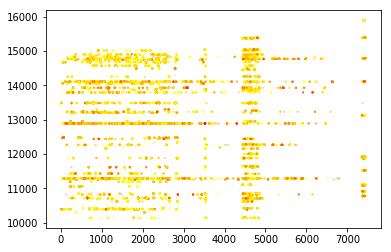

In [513]:
plt.scatter(Xprime[:, 4], Xprime[:, 5], alpha=0.2, marker='o', s=5, lw=0, color=colors)
plt.show()

In [662]:
from sklearn.preprocessing import QuantileTransformer
qtu = QuantileTransformer(output_distribution='uniform')

In [640]:
from sklearn.preprocessing import QuantileTransformer
qtn = QuantileTransformer(output_distribution='normal')

In [641]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [642]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [643]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [685]:
norm.fit(Xprime)
X = norm.transform(Xprime)

# Prediction

### Data Split

In [673]:
from sklearn import model_selection

In [674]:
trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2)

### Predict with Decision Tree

In [675]:
from sklearn.tree import DecisionTreeClassifier

In [676]:
dtc = DecisionTreeClassifier(max_depth=4)
predy = dtc.fit(trainX, trainy).predict(testX)

In [677]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87803


### Predict with Random Forest

In [678]:
from sklearn.ensemble import RandomForestClassifier

In [679]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=20)
predy = rfc.fit(trainX, trainy).predict(testX)

In [680]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87867


### Predict with Linear Classifier

In [653]:
from sklearn.linear_model import Perceptron

In [654]:
perc = Perceptron(max_iter=5, tol=None)
predy = perc.fit(trainX, trainy).predict(testX)

In [655]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87255


### Predict with Naive Bayes

In [656]:
from sklearn.naive_bayes import GaussianNB

In [657]:
gnb = GaussianNB()
predy = gnb.fit(trainX, trainy).predict(testX)

In [658]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.84477


### Predict with Neural Network

In [659]:
from sklearn.neural_network import MLPClassifier

In [660]:
mlpc = MLPClassifier()
predy = mlpc.fit(trainX, trainy).predict(testX)

In [661]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87213


# Prediction for 2017

In [692]:
data2017 = pd.read_csv('toslc2017.csv', index_col=0, low_memory=False)
data2017 = data2017[['Month','DayofMonth','AirlineID','TailNum','FlightNum',
                     'OriginAirportID','CRSDepTime','FlightDate','CRSArrTime',
                     'Distance','ArrDel15']]
data2017 = data2017.dropna(axis=0, how='any')
data2017.is_copy = False

In [695]:
le.transform(data2017['TailNum'])

TypeError: '<' not supported between instances of 'int' and 'str'